**UAS STKI - Klasifikasi Twitter**
Nama Kelompok : 

Falah Hikamudin Arby - 18.01.53.0029
Dwiki Vio Setyadarma - 18.01.53.0011
Tata Redha Al Fath - 18.01.53.0014

In [44]:

pip install tweepy

Note: you may need to restart the kernel to use updated packages.


In [45]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.


In [46]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [47]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [48]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [49]:
#Importing Libraries
import tweepy
from textblob import TextBlob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud
import json
from collections import Counter

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [50]:
import tweepy

api_key = 'CvqigY69okAvBCSU7m6N88Cqm'
api_secret_key = 'zyzIJzwCHWWp20Tx5qFq1Bl2hHHjo4ITBJ1j5z4RVUPGBZCvNb'
access_token = '1303853139787878400-2ax3I6QgLSs9ANKLC6MUm7Vz8ZY40x'
access_token_secret = 'cRUf05KQnMnD72pkuV8fRKeoKD6mWV0YX4LtmaXd91N1x'

auth = tweepy.OAuthHandler(api_key, api_secret_key)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [51]:

#Mencari/Search Topik Pilkada di Twitter dan menghindari retweet serta kalimat tidak senonoh
cari_topik = 'pilkada'
hindari_retweet = '-RT'
hindari_kata = '-vcs'
query = cari_topik+' & '+hindari_retweet+' & '+hindari_kata
max_tweets = 100
searched_tweets = [status for status in tweepy.Cursor(api.search, q=query, lang="en", include_rts='false').items(max_tweets)]

In [52]:
#Part-2: Sentiment Analysis Report

#Finding sentiment analysis (+ve, -ve and neutral)
hasilAnalisis = []

pos = 0
neg = 0
for tweet in searched_tweets:
    tweet_properties = {}
    tweet_properties['user'] = tweet.user.screen_name
    tweet_properties['tweet'] = tweet.text
    
    analysis = TextBlob(tweet.text)
    if analysis.sentiment[0]>=0:
       pos = pos +1
       tweet_properties['rating'] = "positif"
    else:
       neg = neg + 1
       tweet_properties['rating'] = "negatif"
    hasilAnalisis.append(tweet_properties)
print("Total Positive = ", pos)
print("Total Negative = ", neg)

Total Positive =  87
Total Negative =  13


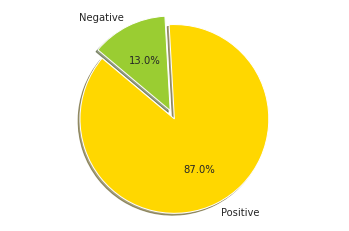

In [53]:
#Plotting sentiments
labels = 'Positive', 'Negative'
sizes = [pos, neg]
colors = ['gold', 'yellowgreen']
explode = (0.1, 0 )  # explode 1st slice
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

In [54]:
hasilAnalisis

[{'user': 'HUMAS_PolresPyk',
  'tweet': '#StopHoax\nSumber :\nhttps://t.co/r7aaLOoiIk https://t.co/q53xEqRoVO',
  'rating': 'positif'},
 {'user': 'kerokero3141',
  'tweet': '@nuicemedia I learned that my parents in Jogja got caught in the election campaign and felt that they "must" go and… https://t.co/AYgwNVfliZ',
  'rating': 'positif'},
 {'user': 'keziadotcom',
  'tweet': "today should've been the last day of my final exam tapi diundur karena pilkada sama retest 🙂🙂🙂",
  'rating': 'positif'},
 {'user': 'Griffith_Uni',
  'tweet': "In @jakpost, @Griffith_Health's @drdickybudiman is speaks on #COVID-19 in Indonesia. He says the daily infection ra… https://t.co/QA5pEj1MuQ",
  'rating': 'positif'},
 {'user': 'setiawan_ewin',
  'tweet': '@DeeOfGlory @CBIpictures @WatchmenID Pilkada be like : Excuse me?',
  'rating': 'negatif'},
 {'user': 'johandjayanto',
  'tweet': 'It was fun and challenging photoshoot during national holiday of Pilkada 2020! 😁\n.\n.\n#PacificPlace #afterphotoshoot… https:

In [56]:
#Part-3: Creating Dataframe of Tweets

#Cleaning searched tweets and converting into Dataframe
my_list_of_dicts = []
for each_json_tweet in searched_tweets:
    my_list_of_dicts.append(each_json_tweet._json)
    
with open('tweet_json_Data.txt', 'w') as file:
        file.write(json.dumps(my_list_of_dicts, indent=4))
        
pos = 0
neg = 0        
my_demo_list = []
with open('tweet_json_Data.txt', encoding='utf-8') as json_file:  
    all_data = json.load(json_file)
    for each_dictionary in all_data:
        user = each_dictionary['user']['screen_name']
        text = each_dictionary['text']
        
        analysis = TextBlob(text)
        if analysis.sentiment[0]>=0:
           pos = pos +1
           rating = each_dictionary['rating'] = "positif"
        else:
           neg = neg + 1
           rating = each_dictionary['rating'] = "negatif"
            
        
        my_demo_list.append({'user': str(user),
                             'text': str(text),
                             'rating': str(rating)
                            })
        
        tweet_dataset = pd.DataFrame(my_demo_list, columns = 
                                  ['user', 'text','rating'
                                   ])


print("Total Positive = ", pos)
print("Total Negative = ", neg)
#Writing tweet dataset ti csv file for future reference
tweet_dataset.to_csv('tweet_data2.csv')

Total Positive =  87
Total Negative =  13


In [57]:
tweet_dataset.head()

,user,text,rating
0,HUMAS_PolresPyk,#StopHoax\nSumber :\nhttps://t.co/r7aaLOoiIk h...,positif
1,kerokero3141,@nuicemedia I learned that my parents in Jogja...,positif
2,keziadotcom,today should've been the last day of my final ...,positif
3,Griffith_Uni,"In @jakpost, @Griffith_Health's @drdickybudima...",positif
4,setiawan_ewin,@DeeOfGlory @CBIpictures @WatchmenID Pilkada b...,negatif


In [58]:
#part 4 - Cleaning Data

#Removing @ handle
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt 

tweet_dataset['text'] = np.vectorize(remove_pattern)(tweet_dataset['text'], "@[\w]*")

In [59]:
tweet_dataset.head()

,user,text,rating
0,HUMAS_PolresPyk,#StopHoax\nSumber :\nhttps://t.co/r7aaLOoiIk h...,positif
1,kerokero3141,I learned that my parents in Jogja got caught...,positif
2,keziadotcom,today should've been the last day of my final ...,positif
3,Griffith_Uni,"In , 's is speaks on #COVID-19 in Indonesia. ...",positif
4,setiawan_ewin,Pilkada be like : Excuse me?,negatif


In [60]:
#Cleaning Tweets
corpus = []
for i in range(0, 100):
    tweet = re.sub('[^a-zA-Z0-9]', ' ', tweet_dataset['text'][i])
    tweet = tweet.lower()
    tweet = re.sub('rt', '', tweet)
    tweet = re.sub('http', '', tweet)
    tweet = re.sub('https', '', tweet)
    tweet = tweet.split()
    ps = PorterStemmer()
    tweet = [ps.stem(word) for word in tweet if not word in set(stopwords.words('english'))]
    tweet = ' '.join(tweet)
    corpus.append(tweet)

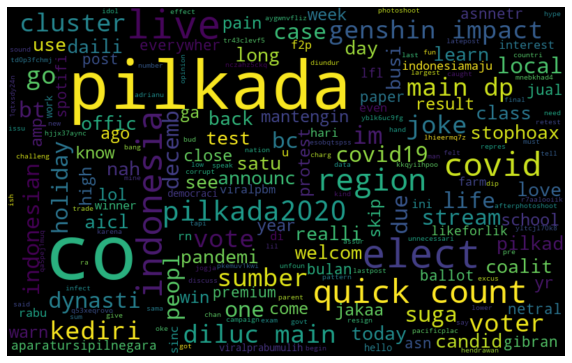

In [61]:

#Part-5: Visualization

#Word Cloud
all_words = ' '.join([text for text in corpus])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [62]:
#Term Freuency - TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=100, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(tweet_dataset['text'])
#Count Most Frequent Words
Counter = Counter(corpus)
most_occur = Counter.most_common(10) 
print(most_occur)

[('stophoax sumber co r7aalooiik co q53xeqrovo', 1), ('learn parent jogja got caught elect campaign felt must go co aygwnvfliz', 1), ('today last day final exam tapi diundur karena pilkada sama retest', 1), ('speak covid 19 indonesia say daili infect ra co qa5pej1muq', 1), ('pilkada like excus', 1), ('fun challeng photoshoot nation holiday pilkada 2020 pacificplac afterphotoshoot co lhieermq7z', 1), ('pre long holiday 14 dip lower due low test 10 ish pilkad co mnebkhad4', 1), ('aicl use data 1489 local elect pilkada see tell us coalit pattern co kkqyiihpoo', 1), ('new aicl adrianu hendrawan coalit indonesian local elect pilkada co yblk6uc9fg', 1), ('love countri co 1qtxsdy24n', 1)]


In [63]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [64]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")

# Warnings
import warnings
warnings.filterwarnings('ignore')

tweet_dataset.columns = ['user', 'text','rating']
tweet_dataset.head()

,user,text,rating
0,HUMAS_PolresPyk,#StopHoax\nSumber :\nhttps://t.co/r7aaLOoiIk h...,positif
1,kerokero3141,I learned that my parents in Jogja got caught...,positif
2,keziadotcom,today should've been the last day of my final ...,positif
3,Griffith_Uni,"In , 's is speaks on #COVID-19 in Indonesia. ...",positif
4,setiawan_ewin,Pilkada be like : Excuse me?,negatif


**EDA**

In [65]:
#  Shape of the dataset, and breakdown of the classes
print("Input data has {} rows and {} columns".format(len(tweet_dataset), len(tweet_dataset.columns)))
print("Out of {} rows, {} are Positif, {} are Negatif".format(len(tweet_dataset),len(tweet_dataset[tweet_dataset['rating']=='positif']),len(tweet_dataset[tweet_dataset['rating']=='negatif'])))

Input data has 100 rows and 3 columns
Out of 100 rows, 87 are Positif, 13 are Negatif


Number of null in label: 0
Number of null in text: 0


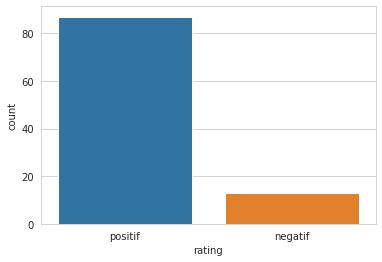

In [66]:
# Missing values in the dataset
print("Number of null in label: {}".format(tweet_dataset['rating'].isnull().sum()))
print("Number of null in text: {}".format(tweet_dataset['text'].isnull().sum()))
sns.countplot(x='rating', data=tweet_dataset);

In [67]:

tweet_positif = tweet_dataset[tweet_dataset['rating']=='positif']
tweet_negatif = tweet_dataset[tweet_dataset['rating']=='negatif']
#convert to list
positif_list= tweet_positif['text'].tolist()
negatif_list= tweet_negatif['text'].tolist()
filtered_positif = ("").join(positif_list) #convert the list into a string of positif
filtered_positif = filtered_positif.lower()
filtered_negatif = ("").join(negatif_list) #convert the list into a string of negatif
filtered_negatif = filtered_negatif.lower()

**Visualizing Word Clouds**

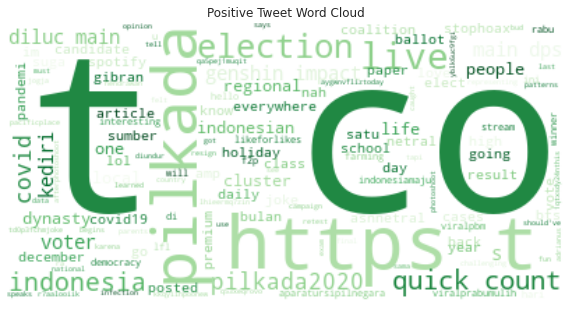

In [68]:
from wordcloud import WordCloud

wordcloud = WordCloud(max_font_size = 160, margin=0, background_color = "white", colormap="Greens").generate(filtered_positif)
plt.figure(figsize=[10,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.title("Positive Tweet Word Cloud")
plt.show()

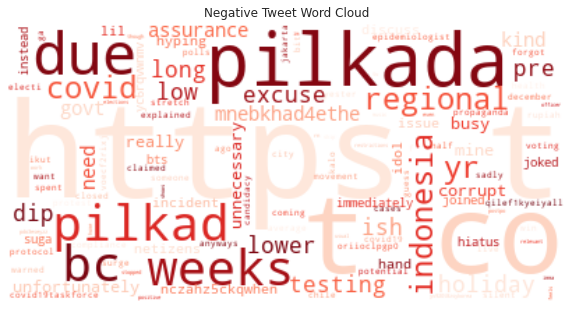

In [69]:

wordcloud = WordCloud(max_font_size = 160, margin=0, background_color = "white", colormap="Reds").generate(filtered_negatif)
plt.figure(figsize=[10,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.title("Negative Tweet Word Cloud")
plt.show()

****Preprocessing the Data****
Cleaning the Text

In [70]:

import string
import re

In [71]:

def clean_text(text):
    return re.sub('[^a-zA-Z]', ' ', text).lower()
tweet_dataset['cleaned_text'] = tweet_dataset['text'].apply(lambda x: clean_text(x))
tweet_dataset['label'] = tweet_dataset['rating'].map({'negatif':0, 'positif':1})

In [72]:

tweet_dataset.head()

,user,text,rating,cleaned_text,label
0,HUMAS_PolresPyk,#StopHoax\nSumber :\nhttps://t.co/r7aaLOoiIk h...,positif,stophoax sumber https t co r aalooiik htt...,1
1,kerokero3141,I learned that my parents in Jogja got caught...,positif,i learned that my parents in jogja got caught...,1
2,keziadotcom,today should've been the last day of my final ...,positif,today should ve been the last day of my final ...,1
3,Griffith_Uni,"In , 's is speaks on #COVID-19 in Indonesia. ...",positif,in s is speaks on covid in indonesia ...,1
4,setiawan_ewin,Pilkada be like : Excuse me?,negatif,pilkada be like excuse me,0


**Tokenization**

In [73]:
def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")), 3)*100
tweet_dataset['text_len'] = tweet_dataset['text'].apply(lambda x: len(x) - x.count(" "))
tweet_dataset['punct'] = tweet_dataset['text'].apply(lambda x: count_punct(x))
tweet_dataset.head()

,user,text,rating,cleaned_text,label,text_len,punct
0,HUMAS_PolresPyk,#StopHoax\nSumber :\nhttps://t.co/r7aaLOoiIk h...,positif,stophoax sumber https t co r aalooiik htt...,1,64,18.8
1,kerokero3141,I learned that my parents in Jogja got caught...,positif,i learned that my parents in jogja got caught...,1,108,6.5
2,keziadotcom,today should've been the last day of my final ...,positif,today should ve been the last day of my final ...,1,78,1.3
3,Griffith_Uni,"In , 's is speaks on #COVID-19 in Indonesia. ...",positif,in s is speaks on covid in indonesia ...,1,85,11.8
4,setiawan_ewin,Pilkada be like : Excuse me?,negatif,pilkada be like excuse me,0,23,8.7


**Lemmatization and Removing Stopwords**

In [74]:
def tokenize_text(text):
    tokenized_text = text.split()
    return tokenized_text
tweet_dataset['tokens'] = tweet_dataset['cleaned_text'].apply(lambda x: tokenize_text(x))
tweet_dataset.head()

,user,text,rating,cleaned_text,label,text_len,punct,tokens
0,HUMAS_PolresPyk,#StopHoax\nSumber :\nhttps://t.co/r7aaLOoiIk h...,positif,stophoax sumber https t co r aalooiik htt...,1,64,18.8,"[stophoax, sumber, https, t, co, r, aalooiik, ..."
1,kerokero3141,I learned that my parents in Jogja got caught...,positif,i learned that my parents in jogja got caught...,1,108,6.5,"[i, learned, that, my, parents, in, jogja, got..."
2,keziadotcom,today should've been the last day of my final ...,positif,today should ve been the last day of my final ...,1,78,1.3,"[today, should, ve, been, the, last, day, of, ..."
3,Griffith_Uni,"In , 's is speaks on #COVID-19 in Indonesia. ...",positif,in s is speaks on covid in indonesia ...,1,85,11.8,"[in, s, is, speaks, on, covid, in, indonesia, ..."
4,setiawan_ewin,Pilkada be like : Excuse me?,negatif,pilkada be like excuse me,0,23,8.7,"[pilkada, be, like, excuse, me]"


**Lemmatization and Removing Stopwords**

In [75]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [76]:
import nltk
nltk.download('wordnet')
from nltk.corpus import stopwords
all_stopwords = stopwords.words('english')
all_stopwords.remove('not')

[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [77]:
def lemmatize_text(token_list):
    return " ".join([lemmatizer.lemmatize(token) for token in token_list if not token in set(all_stopwords)])

lemmatizer = nltk.stem.WordNetLemmatizer()
tweet_dataset['lemmatized_text'] = tweet_dataset['tokens'].apply(lambda x: lemmatize_text(x))
tweet_dataset.head()

,user,text,rating,cleaned_text,label,text_len,punct,tokens,lemmatized_text
0,HUMAS_PolresPyk,#StopHoax\nSumber :\nhttps://t.co/r7aaLOoiIk h...,positif,stophoax sumber https t co r aalooiik htt...,1,64,18.8,"[stophoax, sumber, https, t, co, r, aalooiik, ...",stophoax sumber http co r aalooiik http co q x...
1,kerokero3141,I learned that my parents in Jogja got caught...,positif,i learned that my parents in jogja got caught...,1,108,6.5,"[i, learned, that, my, parents, in, jogja, got...",learned parent jogja got caught election campa...
2,keziadotcom,today should've been the last day of my final ...,positif,today should ve been the last day of my final ...,1,78,1.3,"[today, should, ve, been, the, last, day, of, ...",today last day final exam tapi diundur karena ...
3,Griffith_Uni,"In , 's is speaks on #COVID-19 in Indonesia. ...",positif,in s is speaks on covid in indonesia ...,1,85,11.8,"[in, s, is, speaks, on, covid, in, indonesia, ...",speaks covid indonesia say daily infection ra ...
4,setiawan_ewin,Pilkada be like : Excuse me?,negatif,pilkada be like excuse me,0,23,8.7,"[pilkada, be, like, excuse, me]",pilkada like excuse


**Feature Extraction from Text****
Bag-Of-Words Mode

In [78]:

X = tweet_dataset[['lemmatized_text', 'text_len', 'punct']]
y = tweet_dataset['label']
print(X.shape)
print(y.shape)

(100, 3)
(100,)


In [79]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(70, 3)
(30, 3)
(70,)
(30,)


In [80]:
tfidf = TfidfVectorizer(max_df = 0.5, min_df = 2) # ignore terms that occur in more than 50% documents and the ones that occur in less than 2
tfidf_train = tfidf.fit_transform(X_train['lemmatized_text'])
tfidf_test = tfidf.transform(X_test['lemmatized_text'])

X_train_vect = pd.concat([X_train[['text_len', 'punct']].reset_index(drop=True), 
           pd.DataFrame(tfidf_train.toarray())], axis=1)
X_test_vect = pd.concat([X_test[['text_len', 'punct']].reset_index(drop=True), 
           pd.DataFrame(tfidf_test.toarray())], axis=1)

X_train_vect.head()

,text_len,punct,0,1,2,3,4,5,6,7,...,54,55,56,57,58,59,60,61,62,63
0,124,10.5,0.361919,0.361919,0.361919,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0
1,124,8.9,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0
2,83,18.1,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.527162,0.600874,0.600874,0.0,0.0
3,108,0.9,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.390393,0.390393,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0
4,45,11.1,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0


**Training different Classification models**

In [81]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.80      1.00      0.89        24

    accuracy                           0.80        30
   macro avg       0.40      0.50      0.44        30
weighted avg       0.64      0.80      0.71        30



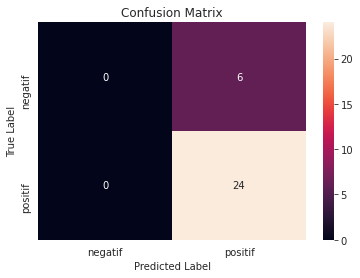

In [82]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train_vect, y_train)
naive_bayes_pred = classifier.predict(X_test_vect)

# Classification Report
print(classification_report(y_test, naive_bayes_pred))

# Confusion Matrix
class_label = ["negatif", "positif"]
df_cm = pd.DataFrame(confusion_matrix(y_test, naive_bayes_pred), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.80      1.00      0.89        24

    accuracy                           0.80        30
   macro avg       0.40      0.50      0.44        30
weighted avg       0.64      0.80      0.71        30



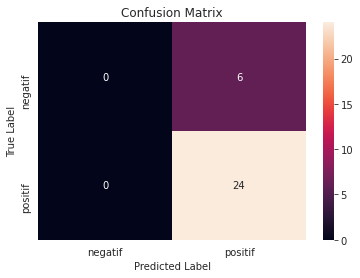

In [83]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=150)
classifier.fit(X_train_vect, y_train)
random_forest_pred = classifier.predict(X_test_vect)

# Classification report
print(classification_report(y_test, random_forest_pred))

# Confusion Matrix
class_label = ["negatif", "positif"]
df_cm = pd.DataFrame(confusion_matrix(y_test, random_forest_pred), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.80      1.00      0.89        24

    accuracy                           0.80        30
   macro avg       0.40      0.50      0.44        30
weighted avg       0.64      0.80      0.71        30



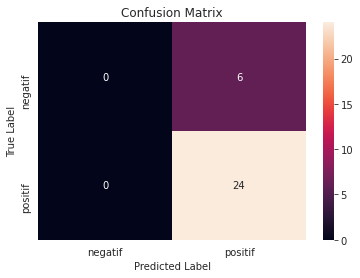

In [84]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train_vect, y_train)
log_reg_pred = classifier.predict(X_test_vect)
# Classification report
print(classification_report(y_test, log_reg_pred))

# Confusion Matrix
class_label = ["negatif", "positif"]
df_cm = pd.DataFrame(confusion_matrix(y_test, log_reg_pred), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.80      1.00      0.89        24

    accuracy                           0.80        30
   macro avg       0.40      0.50      0.44        30
weighted avg       0.64      0.80      0.71        30



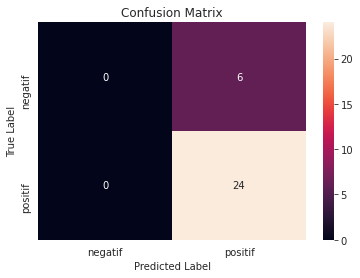

In [85]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train_vect, y_train)
svm_pred = classifier.predict(X_test_vect)
# Classification report
print(classification_report(y_test, svm_pred))

# Confusion Matrix
class_label = ["negatif", "positif"]
df_cm = pd.DataFrame(confusion_matrix(y_test, svm_pred), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.79      0.96      0.87        24

    accuracy                           0.77        30
   macro avg       0.40      0.48      0.43        30
weighted avg       0.63      0.77      0.69        30



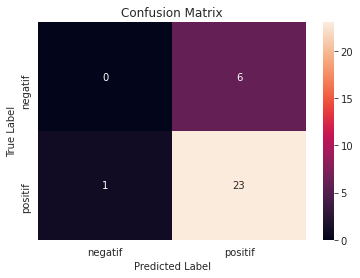

In [86]:

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(X_train_vect, y_train)
knn_pred = classifier.predict(X_test_vect)

# Classification report
print(classification_report(y_test, knn_pred))

# Confusion Matrix
class_label = ["negatif", "positif"]
df_cm = pd.DataFrame(confusion_matrix(y_test, knn_pred), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

**The best performing algorithms so far seem to be Linear SVM, Random Forest and Logistic Regression Classifiers.**

In [87]:
from sklearn.model_selection import cross_val_score

models = [LogisticRegression(), RandomForestClassifier(n_estimators = 150), SVC(kernel = 'linear')]
names = ["Logistic Regression", "Random Forest", "SVM"]
for model, name in zip(models, names):
    print(name)
    for score in ["accuracy", "precision", "recall", "f1"]:
        print(f" {score} - {cross_val_score(model, X_train_vect, y_train, scoring=score, cv=10).mean()} ")

Logistic Regression
 accuracy - 0.9 
 precision - 0.9 
 recall - 1.0 
 f1 - 0.9461538461538461 
Random Forest
 accuracy - 0.9 
 precision - 0.9 
 recall - 0.9857142857142858 
 f1 - 0.9461538461538461 
SVM
 accuracy - 0.9 
 precision - 0.9 
 recall - 1.0 
 f1 - 0.9461538461538461 
